In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [3]:
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

In [7]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value,order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Mon, 22 Nov 2021   AIC                          55214.010
Time:                        22:41:01   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.653      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.924      0.000      -0.896      -0.688
sigma2      3498.7750     40.933     85.476      0.000    3418.548    3579.002
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.22
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

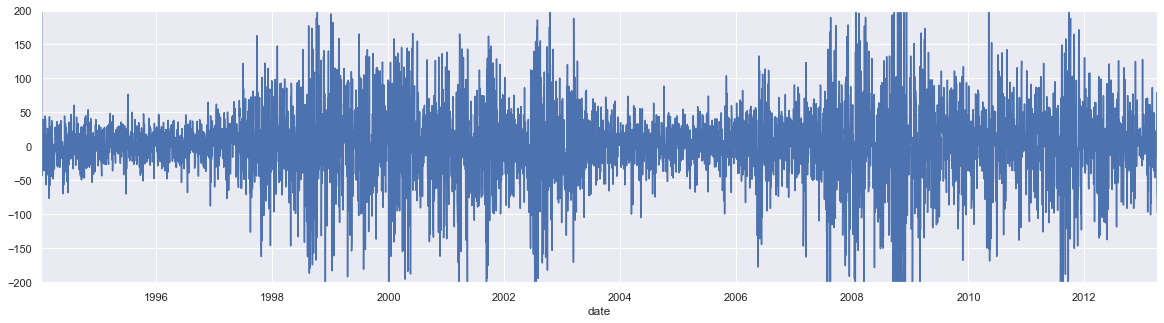

In [8]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
df.res_ar_1_i_1_ma_1.plot(figsize=(20,5))
plt.ylim(-200,200)
plt.show()

sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices",size =20)
plt.ylim(-0.05,0.05)
plt.show()

The 3rd and 4th lags seem highly significant, which suggests that these should be included in the model. 6th and 8th are also border-line significant.This means that we should look at all possible models from ARIMA(1,1,1) to ARIMA(4,1,4). That is 15 models in addition to ARIMA(1,1,1). Instructors has shortlisted the models that performed well, ie. the models which had all coefficients significant at the 5% level. This yields 5 models -

ARIMA(1,1,2),ARIMA(1,1,3),ARIMA(2,1,1),ARIMA(3,1,1),ARIMA(3,1,2)

### Higher Lag ARIMA Models

In [10]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value,order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value,order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value,order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value,order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value,order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [11]:
print("\n ARIMA(1,1,1) : \tLL = ",results_ar_1_i_1_ma_1.llf,"\tAIC = ",results_ar_1_i_1_ma_1.aic)
print("\n ARIMA(1,1,2) : \tLL = ",results_ar_1_i_1_ma_2.llf,"\tAIC = ",results_ar_1_i_1_ma_2.aic)
print("\n ARIMA(1,1,3) : \tLL = ",results_ar_1_i_1_ma_3.llf,"\tAIC = ",results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(2,1,1) : \tLL = ",results_ar_2_i_1_ma_1.llf,"\tAIC = ",results_ar_2_i_1_ma_1.aic)
print("\n ARIMA(3,1,1) : \tLL = ",results_ar_3_i_1_ma_1.llf,"\tAIC = ",results_ar_3_i_1_ma_1.aic)
print("\n ARIMA(3,1,2) : \tLL = ",results_ar_3_i_1_ma_2.llf,"\tAIC = ",results_ar_3_i_1_ma_2.aic)


 ARIMA(1,1,1) : 	LL =  -27604.00511572735 	AIC =  55214.0102314547

 ARIMA(1,1,2) : 	LL =  -27600.407632539707 	AIC =  55208.815265079415

 ARIMA(1,1,3) : 	LL =  -27590.72348194282 	AIC =  55191.44696388564

 ARIMA(2,1,1) : 	LL =  -27600.130551053444 	AIC =  55208.26110210689

 ARIMA(3,1,1) : 	LL =  -27592.336116472296 	AIC =  55194.67223294459

 ARIMA(3,1,2) : 	LL =  -27590.92031806308 	AIC =  55193.84063612616


Clearly, ARIMA(1,1,3) tops our list. As ARIMA(1,1,2) and ARIMA (1,1,1) are nested to it, we need to do an LLR test.

In [18]:
print("\nARIMA(1,1,3) vs ARIMA(1,1,2) = ", LLR_test(model_ar_1_i_1_ma_2,model_ar_1_i_1_ma_3))
print("\nARIMA(1,1,3) vs ARIMA(1,1,1) = ", LLR_test(model_ar_1_i_1_ma_1,model_ar_1_i_1_ma_3,DF=2))


ARIMA(1,1,3) vs ARIMA(1,1,2) =  0.0

ARIMA(1,1,3) vs ARIMA(1,1,1) =  0.0


ARIMA(1,1,3) seems to be the best. So, let us check the ACF of residuals.

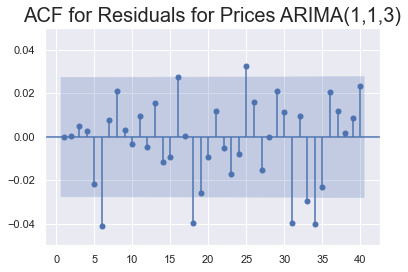

In [20]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices ARIMA(1,1,3)",size =20)
plt.ylim(-0.05,0.05)
plt.show()

The 6th lag seems significant, which means that we have to consider models with LAG 6, that is all models under ARIMA(6,1,6). The instructor has found the important ones for us, the ones in which all coefficients are siginificant. ARIMA(6,1,3) and ARIMA(5,1,1).

In [21]:
model_ar_6_i_1_ma_3 = ARIMA(df.market_value,order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()
model_ar_5_i_1_ma_1 = ARIMA(df.market_value,order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()

In [23]:
print("\n ARIMA(1,1,3) : \tLL = ",results_ar_1_i_1_ma_3.llf,"\tAIC = ",results_ar_1_i_1_ma_3.aic)
print("\n ARIMA(6,1,3) : \tLL = ",results_ar_6_i_1_ma_3.llf,"\tAIC = ",results_ar_6_i_1_ma_3.aic)
print("\n ARIMA(5,1,1) : \tLL = ",results_ar_5_i_1_ma_1.llf,"\tAIC = ",results_ar_5_i_1_ma_1.aic)


 ARIMA(1,1,3) : 	LL =  -27590.72348194282 	AIC =  55191.44696388564

 ARIMA(6,1,3) : 	LL =  -27583.858499797985 	AIC =  55187.71699959597

 ARIMA(5,1,1) : 	LL =  -27586.84460958958 	AIC =  55187.68921917916


ARIMA(6,1,3) seems based on Log likelihood. We can also use LLR test to check as the other two models are nested.

In [27]:
print("\nARIMA(6,1,3) vs ARIMA(1,1,3) = ", LLR_test(model_ar_1_i_1_ma_3,model_ar_6_i_1_ma_3,DF=5))
print("\nARIMA(6,1,3) vs ARIMA(5,1,1) = ", LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3,DF=3))
print("\nARIMA(5,1,1) vs ARIMA(1,1,3) = ", LLR_test(model_ar_1_i_1_ma_3,model_ar_5_i_1_ma_1,DF=2))


ARIMA(6,1,3) vs ARIMA(1,1,3) =  0.017

ARIMA(6,1,3) vs ARIMA(5,1,1) =  0.113

ARIMA(5,1,1) vs ARIMA(1,1,3) =  0.021


ARIMA(6,1,3) is better than ARIMA(1,1,3), but not better than ARIMA(5,1,1), which is again better than ARIMA(1,1,3). Therefore, ARIMA(5,1,1) seems to be best.

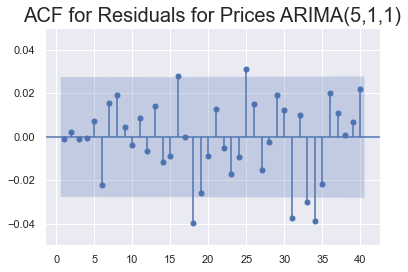

In [28]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:],lags=40,zero=False)
plt.title("ACF for Residuals for Prices ARIMA(5,1,1)",size =20)
plt.ylim(-0.05,0.05)
plt.show()

Now, Lag 6 issue is resolved, and we can see that none of the lags upto 15 are significant.

In [29]:
print(results_ar_5_i_1_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Mon, 22 Nov 2021   AIC                          55187.689
Time:                        23:39:59   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.0

### Higher Layers of Integration.